<a href="https://colab.research.google.com/github/bob8dod/NLP_SelfStudying/blob/main/Classification%20Using%20Multi_Kernel_1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi-Kernel 1D CNN 으로 리뷰 분류

 다양한 크기의 커널들을 혼합하여 분류  
 이를 위해서는 **Keras Function API** 사용 필수

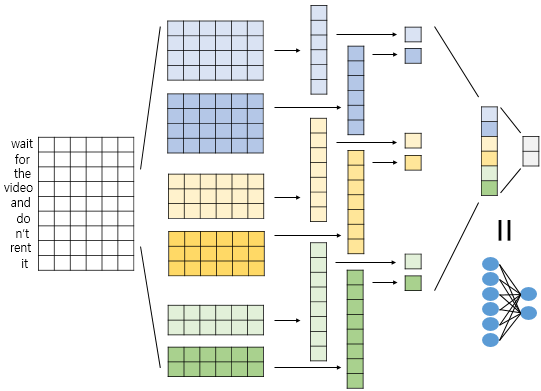

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
# 하이퍼파라미터 정의
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

In [ ]:
# 모델 설계 (Multi-kernel 1D CNN) _ Function API
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

In [ ]:
# 3, 4, 5의 크기를 가지는 커널을 각각 128개 사용
conv_blocks = []

for size in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = size,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

In [ ]:
# 각각 maxpooling한 결과를 연결(concatenate)
# 이를 밀집 층(dense layer)으로 연결
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_data = (X_test, y_test), verbose=1, callbacks=[es, mc])

Epoch 1/10
391/391 [==============================] - 16s 40ms/step - loss: 0.4855 - acc: 0.7728 - val_loss: 0.3644 - val_acc: 0.8439

Epoch 00001: val_acc improved from -inf to 0.84392, saving model to CNN_model.h5
Epoch 2/10
391/391 [==============================] - 14s 37ms/step - loss: 0.3486 - acc: 0.8524 - val_loss: 0.3240 - val_acc: 0.8647

Epoch 00002: val_acc improved from 0.84392 to 0.86472, saving model to CNN_model.h5
Epoch 3/10
391/391 [==============================] - 14s 37ms/step - loss: 0.2778 - acc: 0.8886 - val_loss: 0.3180 - val_acc: 0.8664

Epoch 00003: val_acc improved from 0.86472 to 0.86640, saving model to CNN_model.h5
Epoch 4/10
391/391 [==============================] - 14s 37ms/step - loss: 0.2313 - acc: 0.9109 - val_loss: 0.3243 - val_acc: 0.8630

Epoch 00004: val_acc did not improve from 0.86640
Epoch 5/10
391/391 [==============================] - 14s 36ms/step - loss: 0.2028 - acc: 0.9245 - val_loss: 0.3389 - val_acc: 0.8598

Epoch 00005: val_acc did n

In [ ]:
loaded_model = load_model('CNN_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 5s 7ms/step - loss: 0.3180 - acc: 0.8664

 테스트 정확도: 0.8664
